# Data Analysis

We would analyse the data to find valuable information.
We would be doing the following analysis: 

- Are non STEM students more self-confident than STEM students
  and which one of them are more likely to become entrepreneurs? 

- Does competitiveness affect the physical health and mental
  disorder condition of a student? 

- If a student is influenced, then what matters more: 
  confidence or projects? Is this different for STEM 
  and non STEM students?  

- What is the relation between having mental disorder
  and self-confidence or self-reliance? How does it
  change with age? Is it different for people who do
  not have a mental disorder?

- Is there a difference in the mental and physical health of people
  who may or may not become entrepreneurs?

- Which traits are most and least helpful for being an
  entrepreneur and do these traits differ for people 
  from and not from a city?  

- What is the correlation between a strong need to achieve
  something or the desire to take initiative and the probability
  of becoming an entrepreneur?

- How does competitiveness change with age or degree?

- Is there a relation between not having mental disorders
  and being influenced by someone?


## First we have to pre-preprocess data

In [2]:
# import libraraies
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

def get_data() -> pd.DataFrame:

    # load data
    data = pd.read_csv('data.csv')

    # remove unwanted columns
    data = data.drop(columns=['ReasonsForLack'], axis=1)

    # saving the unique values for lable encoding
    values = {column: list(data[column].unique()) 
            for column in data.columns.values}

    # Add a filed called is_stem which tells whether a student has taken a science degree or not
    stem_fields = ['Engineering Sciences',
                'Medicine, Health Sciences',
                'Mathematics or Natural Sciences'] 

    data['is_stem'] = data['EducationSector'].apply(lambda val: 1 if val in stem_fields else 0)
        
    # Lable encode the following columns: IndividualProject, Gender, City, Influenced, MentalDisorder
    columns_to_lable = ['IndividualProject', 'Gender', 'City', 'Influenced', 'MentalDisorder']

    for column in columns_to_lable:
        data[column] = data[column].apply(lambda val: values[column].index(val)) 

    # Onehot encode the following columns : EducationSector, KeyTraits 
    dummies_ed_sec = pd.get_dummies(data['EducationSector'], prefix='degree')
    dummies_traits = pd.get_dummies(data['KeyTraits'], prefix='trait')

    data = data.join(dummies_ed_sec.join(dummies_traits)).drop(columns=['EducationSector', 'KeyTraits'])  
    
    return data 

## Analysis 1 : Are non STEM students more self-confident than STEM students and which one of them are more likely to become entrepreneurs?

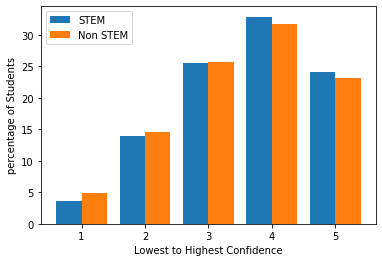

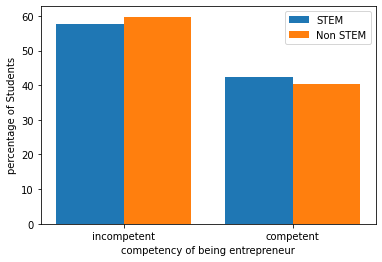

In [3]:
data = get_data()

# -- a) Relation to self confidence
stem = data[data['is_stem'] == 1].groupby(['SelfConfidence']).count()['Age']
not_stem = data[data['is_stem'] == 0].groupby(['SelfConfidence']).count()['Age']

X = range(1, 6)
stem = [stem[index] for index in X]
stem = [(val * 100) / sum(stem) for val in stem]

not_stem = [not_stem[index] for index in X]
not_stem = [(val * 100) / sum(not_stem) for val in not_stem]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, stem, 0.4, label = 'STEM')
plt.bar(X_axis + 0.2, not_stem, 0.4, label = 'Non STEM')


  
plt.xticks(X_axis, X)
plt.xlabel("Lowest to Highest Confidence")
plt.ylabel("percentage of Students")

plt.legend()
plt.show()

# -- b) Relation to competency of being entrepreneur
stem = data[data['is_stem'] == 1].groupby(['y']).count()['Age']
not_stem = data[data['is_stem'] == 0].groupby(['y']).count()['Age']

X = range(2)
stem = [stem[index] for index in X]
stem = [(val * 100) / sum(stem) for val in stem]

not_stem = [not_stem[index] for index in X]
not_stem = [(val * 100) / sum(not_stem) for val in not_stem]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, stem, 0.4, label = 'STEM')
plt.bar(X_axis + 0.2, not_stem, 0.4, label = 'Non STEM')


  
plt.xticks(X_axis, ['incompetent', 'competent'])

plt.xlabel("competency of being entrepreneur")
plt.ylabel("percentage of Students")

plt.legend()
plt.show()

### Conclusion in a Nutshell : 

- non STEM students are as self-confident as STEM students
- both STEM and non STEM students have the same competency of being entrepreneur

## Analysis 2 : Does competitiveness affect the physical health and mental disorder condition of a student?

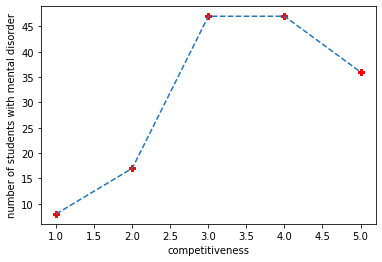

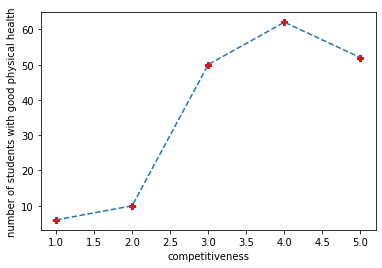

In [4]:
data = get_data()

# -- a) Relation to Mental Disorder Condition
vals = data[data['MentalDisorder'] == 1].groupby(['Competitiveness']).count()['Age']

X = range(1, 6)
y = [vals[index] for index in X]

fig, ax = plt.subplots()

ax.plot(X, y, '--')
ax.scatter(X, y, marker='P', color='red')

ax.set_xlabel('competitiveness')
ax.set_ylabel('number of students with mental disorder')

plt.show()

# -- b) Relation to Physical health
vals = data[data['GoodPhysicalHealth'] >= 3].groupby(['Competitiveness']).count()['Age']

X = range(1, 6)
y = [vals[index] for index in X]

fig, ax = plt.subplots()

ax.plot(X, y, '--')
ax.scatter(X, y, marker='P', color='red')

ax.set_xlabel('competitiveness')
ax.set_ylabel('number of students with good physical health')

plt.show()

### Conclusion in a Nutshell :  
- as the competitiveness increase the number of students with mental disorder increase
- as the competitiveness increase the number of students with good physical health increase

## Analysis 3 : If a student is influenced, then what matters more: confidence or projects? Is this different for STEM and non STEM students? 

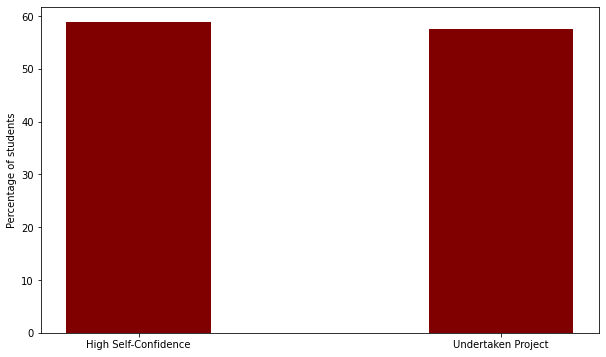

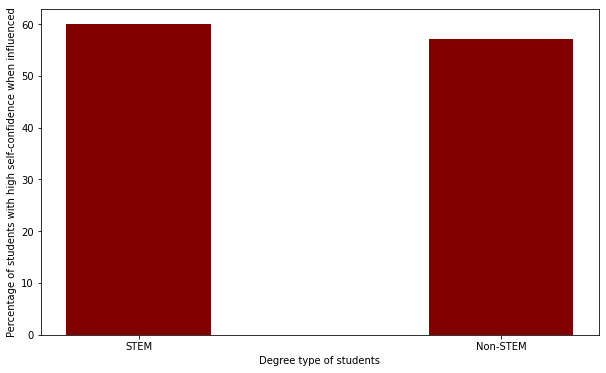

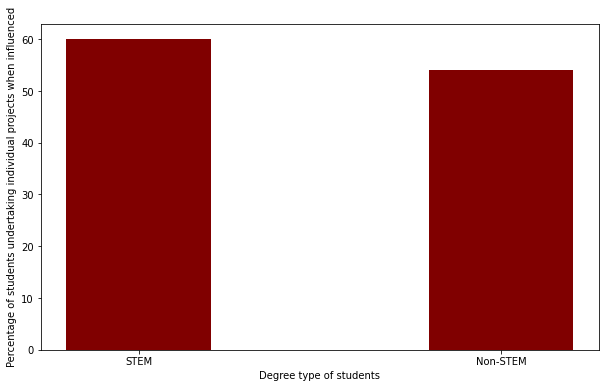

In [5]:
data = get_data()

# -- a) Relation of confidence and projects

# Extracting confidence of influenced students
very_influenced_confidence = data[data['Influenced'] == 1].groupby(['SelfConfidence']).count()['Age']

array_1 = [1, 2, 3, 4, 5]
array_2 = [very_influenced_confidence[x] for x in array_1]

high_conf = (array_2[3] + array_2[4]) * 100 / sum(array_2)

# Extracting projects of influenced students
very_influenced_projects = data[data['Influenced'] == 1].groupby(['IndividualProject']).count()['Age']

project_1 = [0, 1]
project_2 = [very_influenced_projects[x] for x in project_1]

ind_p = project_2[1] * 100 / sum(project_2)

lis_1 = [high_conf, ind_p]
lis_2 = ["High Self-Confidence", "Undertaken Project"]

fig = plt.figure(figsize=(10, 6))

# creating the bar plot
plt.bar(lis_2, lis_1, color='maroon',
        width=0.4)

plt.ylabel("Percentage of students")

plt.show()

# -- b) Relation of confidence for STEM and Non STEM students

# Extracting confidence for STEM students
very_influenced_confidence_stem = data[(data['Influenced'] == 1) & 
                                       (data["is_stem"] == 1)].groupby(['SelfConfidence']).count()['Age']

array_1 = [1, 2, 3, 4, 5]
array_2 = [very_influenced_confidence_stem[x] for x in array_1]

answer_confidence = (array_2[3] + array_2[4]) * 100 / sum(array_2)

# Extracting confidence for non-STEM students
very_influenced_confidence_non_stem = data[(data['Influenced'] == 1) &
                                           (data["is_stem"] == 0)].groupby(['SelfConfidence']).count()['Age']

array_2_non = [very_influenced_confidence_non_stem[x] for x in array_1]
answer_confidence_non = (array_2_non[3] + array_2_non[4]) * 100 / sum(array_2_non)

lis_1 = [answer_confidence, answer_confidence_non]
lis_2 = ["STEM", "Non-STEM"]

fig_3 = plt.figure(figsize=(10, 6))

# creating the bar plot
plt.bar(lis_2, lis_1, color='maroon',
        width=0.4)

plt.ylabel("Percentage of students with high self-confidence when influenced")
plt.xlabel("Degree type of students")

plt.show()

# -- c) Relation of individual projects for STEM and Non STEM students

# Extracting individual projects for STEM students
very_influenced_project_stem = data[(data['Influenced'] == 1) &
                                    (data["is_stem"] == 1)].groupby(['IndividualProject']).count()['Age']

array_1_p = [0, 1]
array_2_p = [very_influenced_project_stem[x] for x in array_1_p]

answer = array_2_p[1] * 100 / sum(array_2_p)

# Extracting individual projects for non-STEM students
very_influenced_projects_non_stem = data[(data['Influenced'] == 1) &
                                         (data["is_stem"] == 0)].groupby(['IndividualProject']).count()['Age']

array_2_non_p = [very_influenced_projects_non_stem[x] for x in array_1_p]
answer2 = array_2_non_p[1] * 100 / sum(array_2_non_p)

lis = [answer, answer2]
lis2 = ["STEM", "Non-STEM"]

fig_2 = plt.figure(figsize=(10, 6))

# creating the bar plot
plt.bar(lis2, lis, color='maroon',
        width=0.4)

plt.ylabel("Percentage of students undertaking individual projects when influenced")
plt.xlabel("Degree type of students")

plt.show()

### Conclusion in a Nutshell:

- When a student is influenced, percentage of students undertaking projects and
having high self-confidence is similar.
- When a student is influenced, the percentage of STEM students and non-STEM students
with high self-confidence is similar.
- When a student is influenced, percentage of STEM students undertaking individual projects is slightly
higher than non-STEM students.

Note: High self-confidence is defined as a rating of 4 or 5 in self-confidence.

## Analysis 4 : What is the relation between having mental disorder and self-confidence or self-reliance? How does it change with age? Is it different for people who do not have a mental disorder?

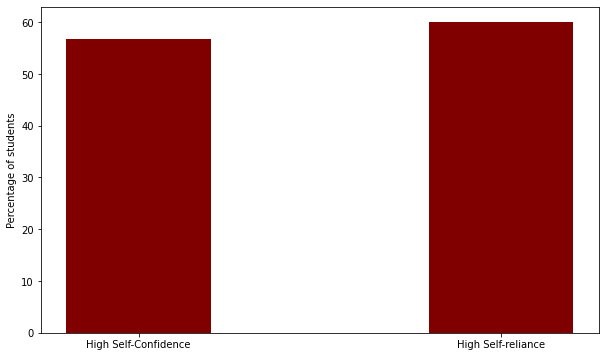

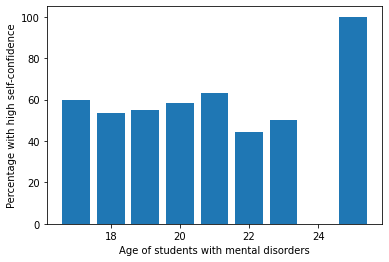

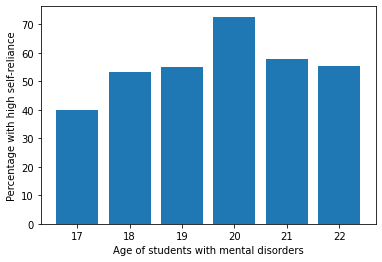

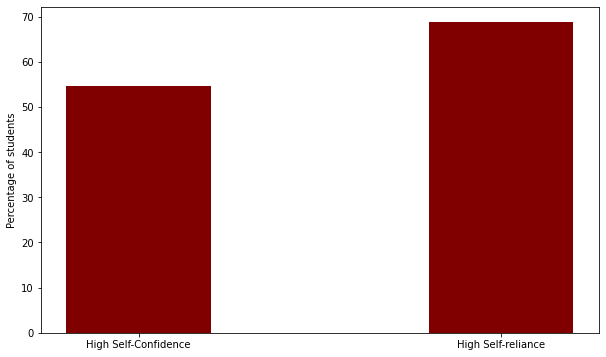

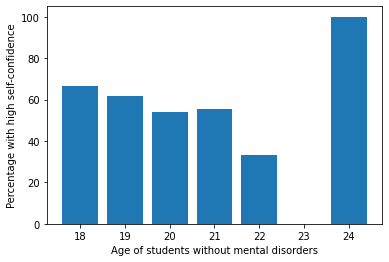

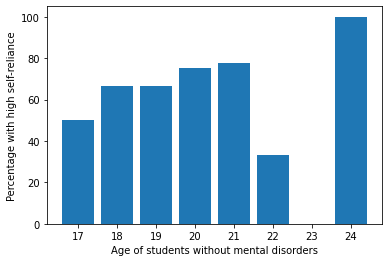

In [6]:
data = get_data()

# a) Relation with self-confidence
mental_disorder_conf = data[data['MentalDisorder'] == 1].groupby(['SelfConfidence']).count()['Age']
array_1 = [1, 2, 3, 4, 5]
array_2 = [mental_disorder_conf[x] for x in array_1]
high_conf = (array_2[3] + array_2[4]) * 100 / sum(array_2)

# b) Relation with self-reliance
mental_disorder_rel = data[data['MentalDisorder'] == 1].groupby(['SelfReliance']).count()['Age']
array_3 = [mental_disorder_rel[x] for x in array_1]
high_rel = (array_3[3] + array_3[4]) * 100 / sum(array_3)

lis_1 = [high_conf, high_rel]
lis_2 = ["High Self-Confidence", "High Self-reliance"]

fig = plt.figure(figsize=(10, 6))

# creating the bar plot
plt.bar(lis_2, lis_1, color='maroon',
        width=0.4)

plt.ylabel("Percentage of students")
plt.show()

# c) Change with age
mental_disorder_age = data[data['MentalDisorder'] == 1]
mental_disorder_full = mental_disorder_age.groupby('Age').count()['Gender']
mental_disorder_age_c = mental_disorder_age[mental_disorder_age["SelfConfidence"] >= 4].groupby('Age').count()['Gender']
lis = [x for x in range(17, 24)]
lis.extend([25])
lis_2 = [mental_disorder_age_c[x] for x in lis]
lis_3 = [mental_disorder_full[x] for x in lis]
percentage = []
for x in range(len(lis_3)):
    percentage.append(lis_2[x] * 100 / lis_3[x])
res = {lis[i]: percentage[i] for i in range(len(percentage))}
plt.bar(res.keys(), res.values())
plt.xlabel("Age of students with mental disorders")
plt.ylabel("Percentage with high self-confidence")
plt.show()

mental_disorder_age_r = mental_disorder_age[mental_disorder_age["SelfReliance"] >= 4].groupby('Age').count()['Gender']
lis_r = [x for x in range(17, 23)]
lis_2_r = [mental_disorder_age_r[x] for x in lis_r]
lis_4 = [mental_disorder_full[x] for x in lis_r]
percentage_r = []
for x in range(len(lis_4)):
    percentage_r.append(lis_2_r[x] * 100 / lis_4[x])
res_r = {lis_r[i]: percentage_r[i] for i in range(len(percentage_r))}
plt.bar(res_r.keys(), res_r.values())
plt.xlabel("Age of students with mental disorders")
plt.ylabel("Percentage with high self-reliance")
plt.show()

# d) Relation with self-confidence -- No mental disorder
no_mental_disorder_conf = data[data['MentalDisorder'] == 0].groupby(['SelfConfidence']).count()['Age']
array_1 = [1, 2, 3, 4, 5]
array_2 = [no_mental_disorder_conf[x] for x in array_1]
high_conf_no = (array_2[3] + array_2[4]) * 100 / sum(array_2)

# e) Relation with self-reliance -- No mental disorder
no_mental_disorder_rel = data[data['MentalDisorder'] == 0].groupby(['SelfReliance']).count()['Age']
array_3 = [no_mental_disorder_rel[x] for x in array_1]
high_rel_no = (array_3[3] + array_3[4]) * 100 / sum(array_3)

lis_1 = [high_conf_no, high_rel_no]
lis_2 = ["High Self-Confidence", "High Self-reliance"]

fig = plt.figure(figsize=(10, 6))

# creating the bar plot
plt.bar(lis_2, lis_1, color='maroon',
        width=0.4)

plt.ylabel("Percentage of students")
plt.show()

# f) Change with age
no_mental_disorder_age = data[data['MentalDisorder'] == 0]
no_mental_disorder_full = no_mental_disorder_age.groupby('Age').count()['Gender']
no_mental_disorder_age_c = \
   no_mental_disorder_age[no_mental_disorder_age["SelfConfidence"] >= 4].groupby('Age').count()['Gender']

lis = [x for x in range(18, 23)]
lis.extend([24])
lis_2 = [no_mental_disorder_age_c[x] for x in lis]
lis_3 = [no_mental_disorder_full[x] for x in lis]
percentage = []
for x in range(len(lis_3)):
    percentage.append(lis_2[x] * 100 / lis_3[x])
res = {lis[i]: percentage[i] for i in range(len(percentage))}
plt.bar(res.keys(), res.values())
plt.xlabel("Age of students without mental disorders")
plt.ylabel("Percentage with high self-confidence")
plt.show()

no_mental_disorder_age_r = \
    no_mental_disorder_age[no_mental_disorder_age["SelfReliance"] >= 4].groupby('Age').count()['Gender']

lis_r = [x for x in range(17, 23)]
lis_r.extend([24])
lis_2_r = [no_mental_disorder_age_r[x] for x in lis_r]
lis_4 = [no_mental_disorder_full[x] for x in lis_r]
percentage_r = []
for x in range(len(lis_4)):
    percentage_r.append(lis_2_r[x] * 100 / lis_4[x])
res_r = {lis_r[i]: percentage_r[i] for i in range(len(percentage_r))}
plt.bar(res_r.keys(), res_r.values())
plt.xlabel("Age of students without mental disorders")
plt.ylabel("Percentage with high self-reliance")
plt.show()

### Conclusion in a Nutshell :

#### With mental disorder:

-  We find that more than half of the students with mental
   disorders have high self-confidence and self-reliance,
   and there is a slightly more percentage of these students
   having high self-reliance than high self-confidence.
    
-  We see that there is no significant difference in the
   percentage of students having mental disorders and having
   high self-confidence from age 17 to 23. However, there is
   a spike in the percentage at age 25, and there are no 
   students who have a mental disorder and high self-confidence
   at age 24.
    
-  We see that the percentage of students with mental disorders
   and having high self-reliance increases till age 20, after 
   which it again decreases.
    
#### Without mental disorder:
-  We find that more than half of the students without mental 
   disorders have high self-confidence and self-reliance, and
   there is a significantly more percentage of these students 
   having high self-reliance than high self-confidence.

-  We see that the percentage of students having mental disorders
   and having high self-confidence from age 18 to 22 decreases.
   However, there is a spike in the percentage at age 24, and there
   are no students who have a mental disorder and high self-confidence
   at age 23.

-  We see that the percentage of students having mental disorders and
   having high self-reliance from age 17 to 21 gradually increases.
   However, there is a spike in the percentage at age 24, and there are
   no students who have a mental disorder and high self-reliance at age 23.
   There is also a significant decline in the percentage at age 22.
    
### Note:
- High self-confidence is defined as a rating of 4 or 5 in self-confidence.
- High self-reliance is defined as a rating of 4 or 5 in self-reliance.
- In the analysis, zero percentages might be explained by the lack of data;
  however, the sudden spikes at ages 24 and 25 are worth further investigation. 

## Analysis 5 : Is there a difference in the mental and physical health of people who may or may not become entrepreneurs?

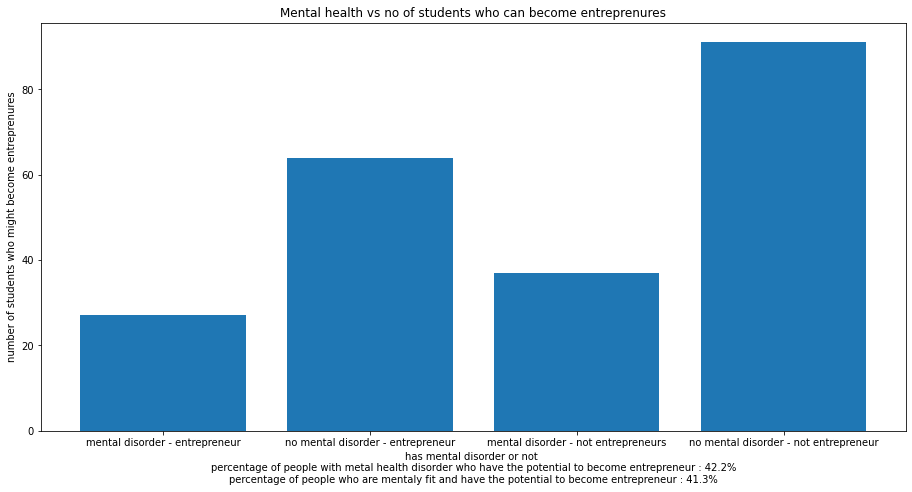

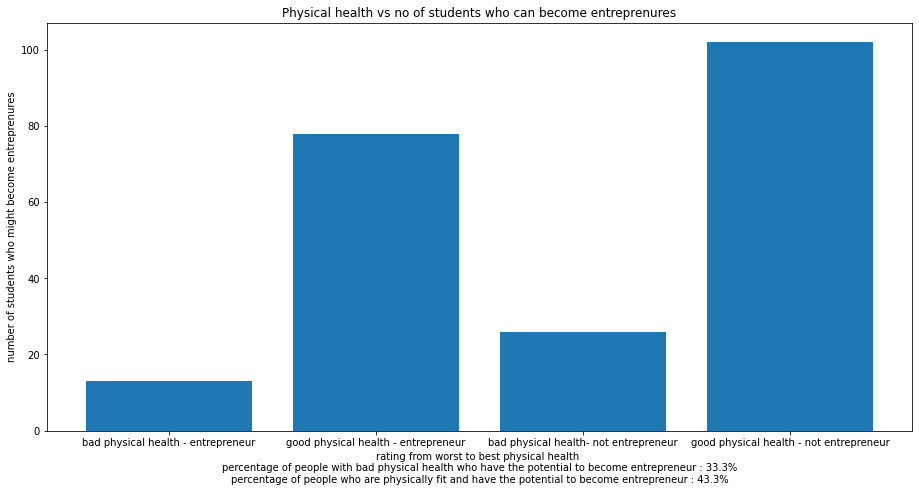

In [7]:
data = get_data()

# -- a) Assosiation with Mental health
fig, ax = plt.subplots()
fig.set_size_inches(15.5, 7.5)

counts = data[data['y'] == 1].groupby(['MentalDisorder']).count()['y']
another_counts = data[data['y'] == 0].groupby(['MentalDisorder']).count()['y']

ax.bar(['mental disorder - entrepreneur',
        'no mental disorder - entrepreneur',
        'mental disorder - not entrepreneurs',
        'no mental disorder - not entrepreneur'],
       [counts[0], counts[1], another_counts[0], another_counts[1]])

ratio_1_calc = round(counts[0] / (counts[0] + another_counts[0]) * 1000) / 10
ratio_2_calc = round(counts[1] / (counts[1] + another_counts[1]) * 1000) / 10

ratio_1 = f'percentage of people with metal health disorder who have the potential to become entrepreneur : {ratio_1_calc}%'
ratio_2 = f'percentage of people who are mentaly fit and have the potential to become entrepreneur : {ratio_2_calc}%'

ax.set_xlabel('has mental disorder or not \n' + ratio_1 + '\n' + ratio_2)
ax.set_ylabel('number of students who might become entreprenures')

ax.set_title('Mental health vs no of students who can become entreprenures')

plt.show()

# -- b) Assosiation with Physical health
fig, ax = plt.subplots()
fig.set_size_inches(15.5, 7.5)

counts = data[data['y'] == 1].groupby(['GoodPhysicalHealth']).count()['y']
another_counts = data[data['y'] == 0].groupby(['GoodPhysicalHealth']).count()['y']

ax.bar(['bad physical health - entrepreneur',
        'good physical health - entrepreneur',
        'bad physical health- not entrepreneur',
        'good physical health - not entrepreneur'],
       [counts[1] + counts[2], counts[3] + counts[4] + counts[5],
        another_counts[1] + another_counts[2], 
        another_counts[3] + another_counts[4] + another_counts[5]])

ratio_1_calc = round((counts[1] + counts[2]) /
                     ((counts[1] + counts[2]) +
                      (another_counts[1] + another_counts[2])) * 1000) / 10

ratio_2_calc = round((counts[3] + counts[4] + counts[5]) /
                     ((counts[3] + counts[4] + counts[5]) +
                      (another_counts[3] + another_counts[4] + another_counts[5])) * 1000) / 10

ratio_1 = f'percentage of people with bad physical health who have the potential to become entrepreneur : {ratio_1_calc}%'
ratio_2 = f'percentage of people who are physically fit and have the potential to become entrepreneur : {ratio_2_calc}%'

ax.set_xlabel('rating from worst to best physical health \n' + ratio_1 + '\n' + ratio_2)
ax.set_ylabel('number of students who might become entreprenures')

ax.set_title('Physical health vs no of students who can become entreprenures')

plt.show()

### Conclusion in a Nutshell : 

- Mental disorder does not but Phyical health does

## Analysis 6 : Which traits are most and least helpful for being an entrepreneur and do these traits differ for people from and not from a city?  

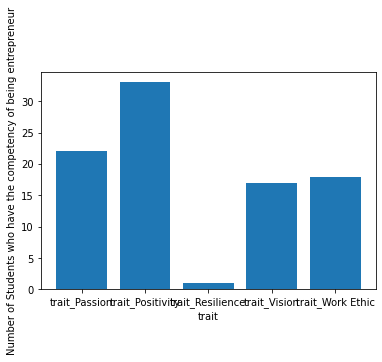

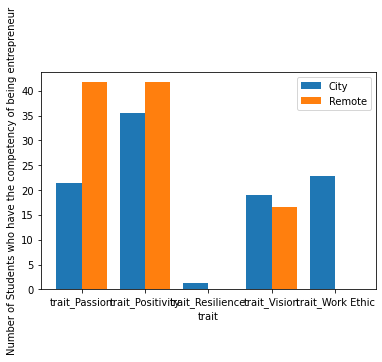

In [8]:
data = get_data()

traits = ['trait_Passion',
          'trait_Positivity',
          'trait_Resilience',
          'trait_Vision',
          'trait_Work Ethic']

def get_vals(d, is_remote = False):
    """Return no of entrepreneurs corresponding to traits"""
    if not is_remote:
        return [d[1][0][0][0][0],
                d[0][1][0][0][0],
                d[0][0][1][0][0],
                d[0][0][0][1][0],
                d[0][0][0][0][1]] 
        
    return [d[1][0][0][0][0],
            d[0][1][0][0][0],
            0,
            d[0][0][0][1][0],
            0]     
                

def get_percent_vals(d, is_remote = False):
    """Return percentage of entrepreneurs corresponding to traits"""
    vals = get_vals(d, is_remote)
    return [(val * 100) / sum(vals) for val in vals]
    
# -- a) Simple relation in traits and competency of being entrepreneur
ploting_data = data[data['y'] == 1].groupby(traits).count()['Age']

plt.bar(traits, get_vals(ploting_data))

plt.xlabel("trait")
plt.ylabel("Number of Students who have the competency of being entrepreneur")

plt.show()

# -- b) Difference in City and Remote
query_city = 'y == 1 and City == 0'
query_remote = 'y == 1 and City == 1'

city = data.query(query_city).groupby(traits).count()['Age']
remote = data.query(query_remote).groupby(traits).count()['Age']

X_axis = np.arange(len(traits))

city_y = get_percent_vals(city, False)
remote_y = get_percent_vals(remote, True)


plt.bar(X_axis - 0.2, city_y, 0.4, label = 'City')
plt.bar(X_axis + 0.2, remote_y, 0.4, label = 'Remote')

plt.xticks(X_axis, traits)

plt.xlabel("trait")
plt.ylabel("Number of Students who have the competency of being entrepreneur")

plt.legend()
plt.show()



### Conclusion in a Nutshell : 

- The order is Positivity > Passion > Work ethic > Vision > Resiliance
- The order is same for both city and remote areas.

## Analysis 7 : What is the correlation between a strong need to achieve something or the desire to take initiative and the probability of becoming an entrepreneur?

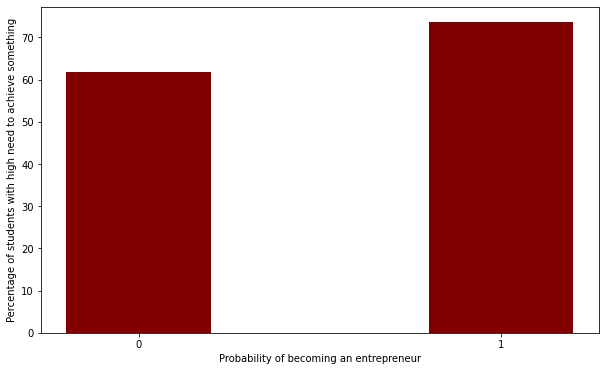

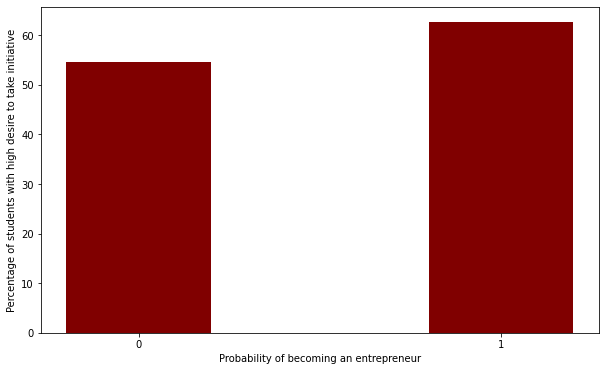

In [9]:
data = get_data()

# a) Strong need to achieve something
strong_need = data[data['StrongNeedToAchieve'] >= 4].groupby('y').count()['Gender']

lis = [0, 1]
full_need = data.groupby('y').count()['Gender']

lis_2 = [strong_need[x] for x in lis]
lis_3 = [full_need[x] for x in lis]
percentage = []
lis_4 = ["0", "1"]
for x in range(len(lis_3)):
    percentage.append(lis_2[x] * 100 / lis_3[x])
fig = plt.figure(figsize=(10, 6))

# creating the bar plot
plt.bar(lis_4, percentage, color='maroon',
        width=0.4)
plt.ylabel("Percentage of students with high need to achieve something")
plt.xlabel("Probability of becoming an entrepreneur")
plt.show()

# b) Desire to take initiative
strong_desire = data[data['DesireToTakeInitiative'] >= 4].groupby('y').count()['Gender']

lis = [0, 1]
full_desire = data.groupby('y').count()['Gender']

lis_2 = [strong_desire[x] for x in lis]
lis_3 = [full_desire[x] for x in lis]
percentage = []
lis_4 = ["0", "1"]
for x in range(len(lis_3)):
    percentage.append(lis_2[x] * 100 / lis_3[x])
fig = plt.figure(figsize=(10, 6))

# creating the bar plot
plt.bar(lis_4, percentage, color='maroon',
        width=0.4)
plt.ylabel("Percentage of students with high desire to take initiative")
plt.xlabel("Probability of becoming an entrepreneur")
plt.show()


### Conclusion in a Nutshell:
-  We see that 60% of students with no probability of becoming an
   entrepreneur had a high need to achieve something, and 70% of 
   students with probability of becoming an entrepreneur had a high
   need to achieve something.
   
-  We see that 55% of students with no probability of becoming an
   entrepreneur had a high desire to take initiative, and 70% of
   students with probability of becoming an entrepreneur had a high
   desire to take initiative.

### Note: 
- High desire to take initiative and high need to achieve something is defined as a rating of 4 or 5 on their respective scales.

## Analysis 8 : How does competitiveness change with age or degree?

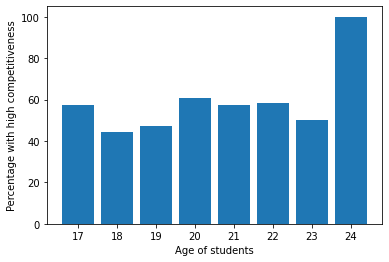

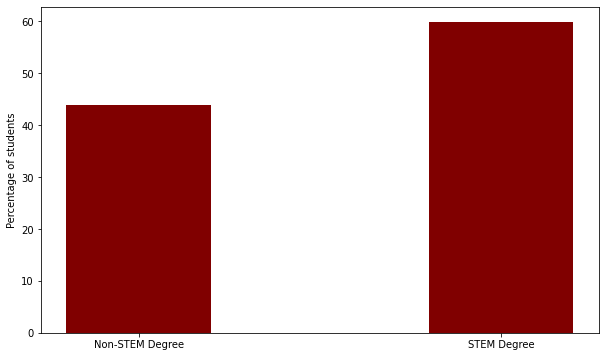

In [10]:
data = get_data()

# a) Change with age
change_with_age = data[data['Competitiveness'] >= 4].groupby('Age').count()['Gender']

lis = [x for x in range(17, 25)]
full_age = data.groupby('Age').count()['Gender']

lis_2 = [change_with_age[x] for x in lis]
lis_3 = [full_age[x] for x in lis]
percentage = []
for x in range(len(lis_3)):
    percentage.append(lis_2[x] * 100 / lis_3[x])
res = {lis[i]: percentage[i] for i in range(len(percentage))}
plt.bar(res.keys(), res.values())
plt.xlabel("Age of students")
plt.ylabel("Percentage with high competitiveness")
plt.show()

# b) Change with degree
change_with_degree = data[data['Competitiveness'] >= 4].groupby('is_stem').count()['Gender']

lis = [0, 1]
full_degree = data.groupby('is_stem').count()['Gender']

lis_2 = [change_with_degree[x] for x in lis]
lis_3 = [full_degree[x] for x in lis]
percentage = []
for x in range(len(lis_3)):
    percentage.append(lis_2[x] * 100 / lis_3[x])
res = {lis[i]: percentage[i] for i in range(len(percentage))}
lis_2 = ["Non-STEM Degree", "STEM Degree"]

fig = plt.figure(figsize=(10, 6))

# creating the bar plot
plt.bar(lis_2, percentage, color='maroon',
        width=0.4)

plt.ylabel("Percentage of students")
plt.show()


### Conclusion in a Nutshell:
- With age:
    We find that more that about 60% students have a high
    competitiveness at age 17. This percentage decreases
    for two years, and then increases at age 20, remaining
    almost the same for the upcoming ages. Then, there is a 
    spike in the percentage at age 24.

- With degree:
    We find that about 60% of STEM students have high competitiveness
    whereas 40% of non-STEM students have high competitiveness.

### Note:
- High competitiveness is defined as a rating of 4 or 5 on competitiveness.

## Analysis 9 : Is there a relation between not having mental disorders and being influenced by someone?

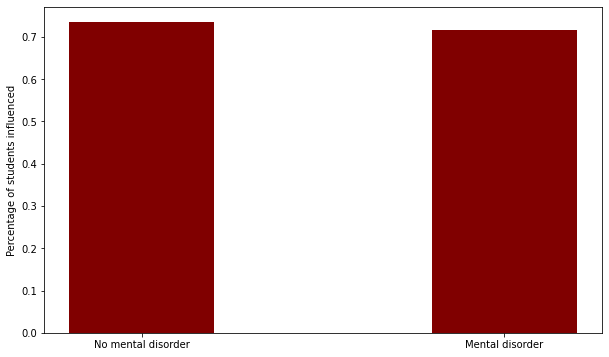

In [12]:
data = get_data()

from data_preprocessing import data
import matplotlib.pyplot as plt

no_mental_disorder = data[data['MentalDisorder'] == 0].groupby("Influenced").count()['Age']
lis = [0, 1]
lis_2 = [no_mental_disorder[x] for x in lis]
influenced = lis_2[1] / sum(lis_2)

mental_disorder = data[data['MentalDisorder'] == 1].groupby("Influenced").count()['Age']
lis_3 = [mental_disorder[x] for x in lis]
influenced_1 = lis_3[1] / sum(lis_3)

plot = [influenced, influenced_1]
plot_1 = ["No mental disorder", "Mental disorder"]
fig = plt.figure(figsize=(10, 6))

# creating the bar plot
plt.bar(plot_1, plot, color='maroon',
        width=0.4)

plt.ylabel("Percentage of students influenced")
plt.show()


### Conclusion in a Nutshell:
- There is no significant difference in the percentage of students with or without mental disorders who are influenced by someone.